In [31]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
df = pd.read_csv("Merged_data.csv")
Y = df['Returns']

Optimization terminated successfully.
         Current function value: -18489763406.230595
         Iterations: 1
         Function evaluations: 96
         Gradient evaluations: 16


/Users/prajwalparlawar/anaconda3/envs/homeworkstock/lib/python3.7/site-packages/ipykernel_launcher.py:74: OptimizeWarning: Unknown solver options: xtol


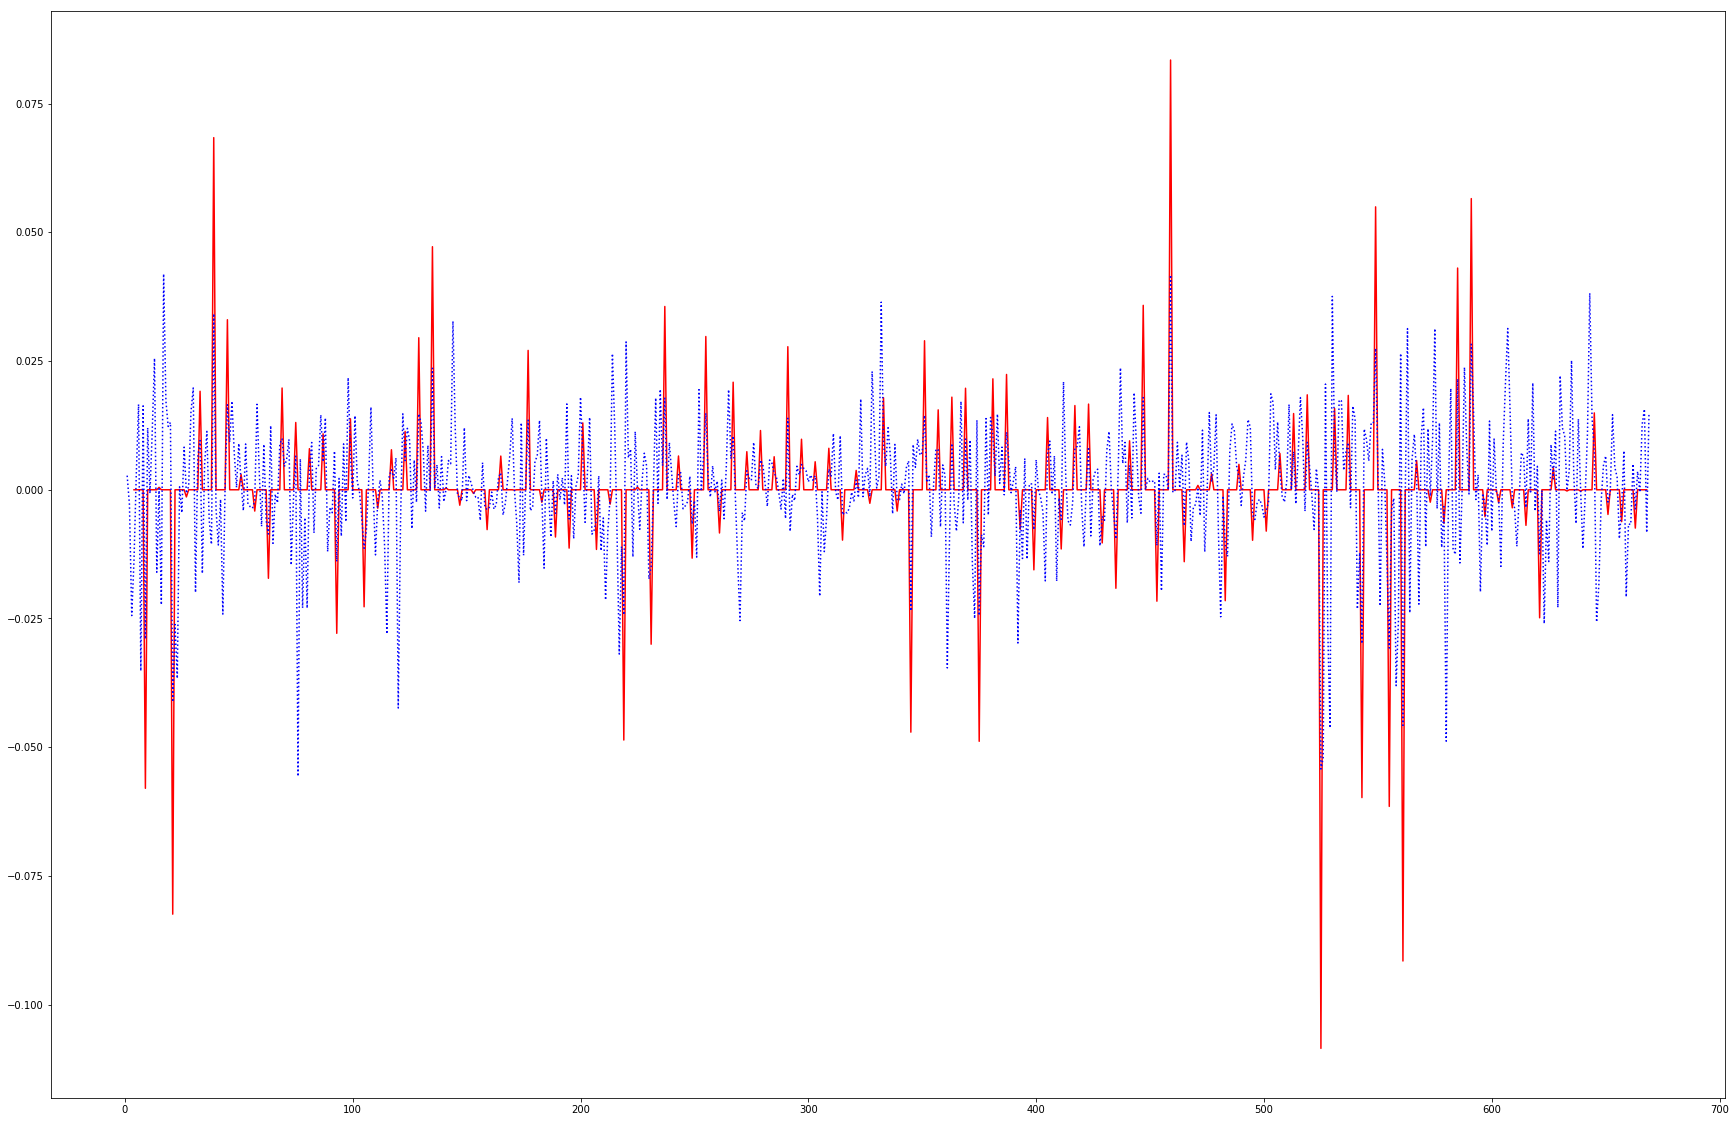

In [45]:
def Kalman_Filter(Y):
    S = Y.shape[0]
    S = S + 1
    Z = param0[0]
    T = param0[1]
    H = param0[2]
    Q = param0[3]
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)

    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)

    for s in range(1,S):
        if s == 1:
            P_update[s] = 1000
            P_predict[s] = T*P_update[1]*np.transpose(T)+Q

        else:
            F[s] = Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1] + P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_update[s]
            P_update[s] = P_predict[s-1] - P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
            KF_Dens[s] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(abs(F[s])) + (1/2)*np.transpose(v[s])*(1/F[s])
            likelihood = sum(KF_Dens[1:-1])
    return likelihood    

def Kalman_Smoother(params, Y):
    S = Y.shape[0]
    S = S + 1
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)

    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)

    for s in range(1,S):
        if s == 1:
            P_update[s] = 1000
            P_predict[s] = T*P_update[1]*np.transpose(T)+Q

        else:
            F[s] = Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1] + P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_update[s]
            P_update[s] = P_predict[s-1] - P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    u_smooth = np.zeros(S)
    P_smooth = np.zeros(S)
    u_smooth[S-1] = u_update[S-1]
    P_smooth[S-1] = P_update[S-1]
    
    for t in range(S-1, 0,-1):
        u_smooth[t-1] = u_update[t]+P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]-T*u_update[t])
        P_smooth[t-1] = P_update[t]+P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_predict[t])/P_predict[t]*T*P_update[t]
    u_smooth = u_smooth[0:-1]
    return u_smooth 
Y = df['Returns']
T = Y.shape[0]
param0 = np.array([0.5,5.95,10*np.var(Y),10*np.var(Y)])
param_star = minimize(Kalman_Filter, param0, method = 'BFGS', options= {'xtol': 1e-8, 'disp':True})
Y_update = Kalman_Smoother(param_star.x, Y)
timevec = np.linspace(1,T,T)
plt.figure(figsize=(30,20))
plt.plot(timevec[3:-1],Y_update[3:-1], 'r', timevec, Y,'b:')

In [46]:
rmse=np.sqrt(np.mean(((df['Returns'])- Y_update )**2))

rmse

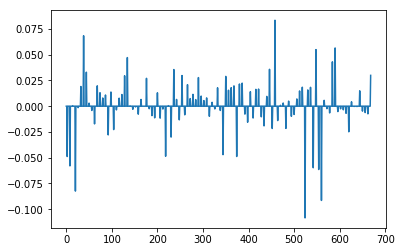

In [47]:
plt.plot(Y_update)

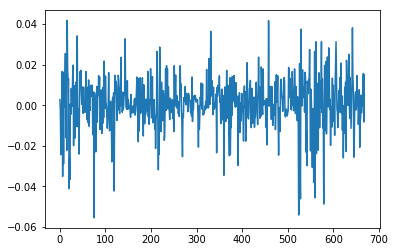

In [48]:
plt.plot(df['Returns'])

In [49]:
rmse

0.012708162291271497